# Import Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Dataset

In [53]:
df=pd.read_csv("grid_data.csv")
df.tail(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
9990,5.783299,4.726614,1.340273,8.617933,4.587533,-1.950574,-1.594137,-1.042822,0.445853,0.645680,0.406864,0.726180,0.028673,unstable
9991,0.998988,9.924916,8.926563,2.885941,3.660232,-1.103521,-1.105641,-1.451070,0.717660,0.954919,0.491107,0.692023,0.008260,unstable
9992,3.114442,4.781072,2.427918,7.989509,2.673156,-0.918191,-0.652736,-1.102228,0.867950,0.888858,0.460587,0.965026,0.064645,unstable
9993,5.754191,3.032743,5.084803,4.633624,5.199250,-1.717030,-1.713212,-1.769009,0.157284,0.975921,0.511555,0.696591,0.050212,unstable
9994,2.042954,8.514335,8.173809,5.466635,3.783797,-1.639912,-0.662469,-1.481417,0.154129,0.944486,0.053225,0.499109,0.026311,unstable
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable
9999,6.530527,6.781790,4.349695,8.673138,3.492807,-1.390285,-1.532193,-0.570329,0.073056,0.505441,0.378761,0.942631,0.045263,unstable


# Exploratory Data Analysis

In [54]:
# summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [55]:
# checking the presence of missing values in each column
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [56]:
# descriptive statistics
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


unstable    6380
stable      3620
Name: stabf, dtype: int64


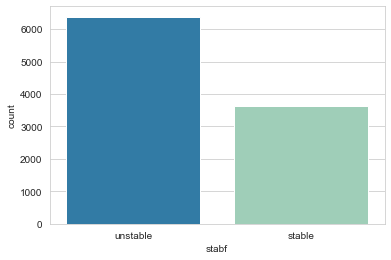

In [57]:
# Show the counts of observations in each category.
print(df['stabf'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='stabf',data=df, palette='YlGnBu_r')

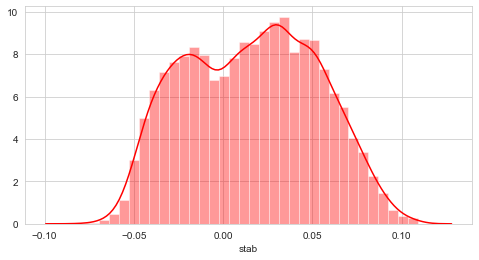

In [58]:
# distribution of observations in column 'stab'.
plt.figure(figsize=(8,4))
sns.distplot(df['stab'], color='r')

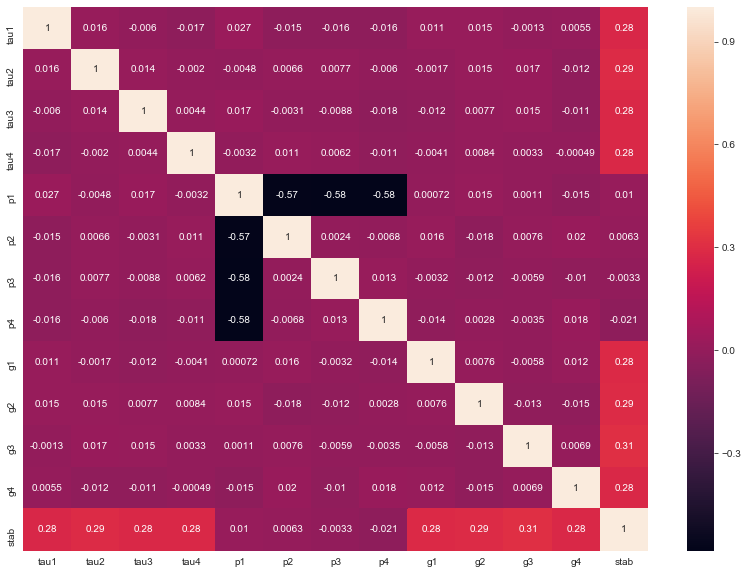

In [59]:
# correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

# Train Test Split

In [60]:
X = df.drop(['stab', 'stabf'],axis=1)
y = df['stab']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling

In [61]:
import joblib
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

# Build the Model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [63]:
X_train.shape

(8000, 12)

In [64]:
model = Sequential()
model.add(Dense(12, activation='elu'))
model.add(Dropout(0.5))

model.add(Dense(3,activation='elu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [66]:
model.fit(x=X_train,y=y_train.values,
          validation_split=0.1,
          batch_size=32,epochs=100, callbacks=[early_stop])

Epoch 1/100
225/225 [==============================] - 1s 6ms/step - loss: 0.4898 - val_loss: 0.0583
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.1209 - val_loss: 0.0137
Epoch 3/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0503 - val_loss: 0.0054
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0252 - val_loss: 0.0029
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0140 - val_loss: 0.0021
Epoch 6/100
225/225 [==============================] - 1s 4ms/step - loss: 0.0093 - val_loss: 0.0016
Epoch 7/100
225/225 [==============================] - 1s 4ms/step - loss: 0.0065 - val_loss: 0.0014
Epoch 8/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0012
Epoch 9/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 10/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0029 - val_lo

In [67]:
# save the model
model.save('Electrical_Grid_Stability.h5')

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 12)                  156       
_________________________________________________________________
dropout (Dropout)            (32, 12)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 3)                   39        
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   4         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


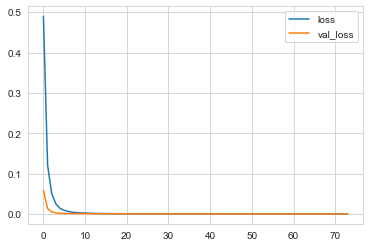

In [69]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Model Evaluation

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)

In [71]:
predictions

array([[0.04737282],
       [0.02468352],
       [0.02099694],
       ...,
       [0.00836718],
       [0.06481464],
       [0.02350764]], dtype=float32)

In [72]:
mean_absolute_error(y_test,predictions)

0.015933133282084053

In [73]:
mean_squared_error(y_test,predictions)

0.00041859815952952154

In [74]:
np.sqrt(mean_squared_error(y_test,predictions))

0.020459671540118175

In [75]:
from tensorflow.keras.models import load_model

In [82]:
model_grid = load_model('Electrical_Grid_Stability.h5')
scaler=load('Scaler.joblib')

In [83]:
from sklearn.preprocessing import StandardScaler
def foo(t1, t2, t3, t4, p1, p2, p3, p4, g1, g2, g3, g4):
    X_test = scaler.transform([[t1, t2, t3, t4, p1, p2, p3, p4, g1, g2, g3, g4]])
    prediction = model_grid.predict(X_test)
    print(prediction[0][0])
    if prediction[0][0]>=0:
        return "Oops! the system is linearly unstable."
    else:
        return "Great! the system is stable."

In [84]:
foo(4.689852, 4.007747, 1.478573, 3.733787, 4.041300, -1.410344, -1.238204, -1.392751, 0.269708, 0.250364, 0.164941, 0.482439)

-0.03427185


'Great! the system is stable.'

In [85]:
foo(2.042954, 8.514335, 8.173809, 5.466635, 3.783797, -1.639912,-0.662469, -1.481417, 0.154129, 0.944486, 0.053225, 0.499109)

0.010151699


'Oops! the system is linearly unstable.'

In [86]:
foo(6.530527, 6.781790, 4.349695, 8.673138, 3.492807, -1.390285, -1.532193, -0.570329, 0.073056, 0.505441, 0.378761, 0.942631)

0.037708193


'Oops! the system is linearly unstable.'

In [87]:
foo(3.392299, 1.274827, 2.954947, 6.894759, 4.349512, -1.663661, -0.952437, -1.733414, 0.502079, 0.567242, 0.285880, 0.366120)

-0.013400301


'Great! the system is stable.'